In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords   
import string

[nltk_data] Downloading package punkt_tab to /home/varun/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Define the Problem Statement and perform Exploratory Data Analysis

### Definition
The goal is to accurately categorize news articles into various categories like politics, technology, sports, business, and entertainment to enhance user engagement and content relevancy.

### Observations on Data

In [22]:
df = pd.read_csv("flipitnewsdata.csv")
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [23]:
df.shape

(2225, 2)

In [24]:
df.dtypes

Category    object
Article     object
dtype: object

In [25]:
df.isnull().sum()

Category    0
Article     0
dtype: int64

In [26]:
df.describe()

,Category,Article
count,2225,2225
unique,5,2126
top,Sports,blind student hears in colour a blind studen...
freq,511,2


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


### Univariate Analysis

<Axes: xlabel='Category', ylabel='count'>

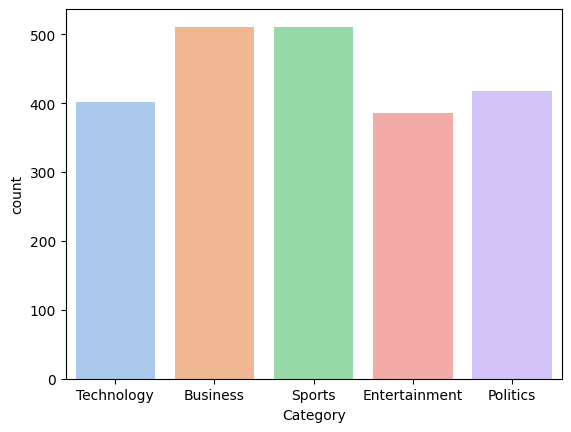

In [28]:
sns.countplot(df, x="Category", 
              hue="Category", 
              legend=False, 
              palette="pastel")

### Text Data Analysis

<Axes: xlabel='article_length', ylabel='Density'>

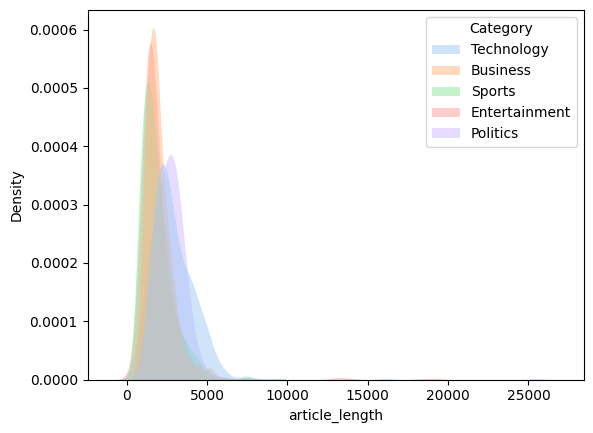

In [29]:
df["article_length"] = [len(art) for art in df["Article"]]

sns.kdeplot(df,
            x="article_length",
            hue="Category",
            fill=True, 
            common_norm=False, 
            palette="pastel",
            alpha=.5, 
            linewidth=0)

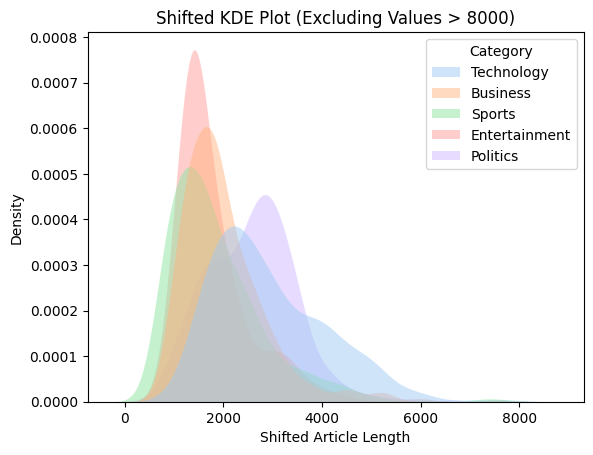

In [30]:
# Filter out values greater than 8000
df_filtered = df[df["article_length"] <= 8000]

# Plot the shifted KDE plot
sns.kdeplot(df_filtered,
            x="article_length",
            hue="Category",
            fill=True, 
            common_norm=False, 
            palette="pastel",
            alpha=.5, 
            linewidth=0)

plt.title("Shifted KDE Plot (Excluding Values > 8000)")
plt.xlabel("Shifted Article Length")
plt.show()

### Illustrate the insights based on EDA
Bar plot shows a higher frequency of business-related articles, suggesting a focus on finance and investment news."

## Data Preprocessing

### Dubplicate check

In [31]:
df.head()

,Category,Article,article_length
0,Technology,tv future in the hands of viewers with home th...,4333
1,Business,worldcom boss left books alone former worldc...,1842
2,Sports,tigers wary of farrell gamble leicester say ...,1342
3,Sports,yeading face newcastle in fa cup premiership s...,2176
4,Entertainment,ocean s twelve raids box office ocean s twelve...,1579


In [32]:
df.drop(columns=["article_length"], inplace= True)
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [33]:
df[df.duplicated()]

,Category,Article
85,Politics,hague given up his pm ambition former conser...
301,Politics,fox attacks blair s tory lies tony blair lie...
496,Technology,microsoft gets the blogging bug software giant...
543,Business,economy strong in election year uk businesse...
582,Entertainment,ray dvd beats box office takings oscar-nominat...
...,...,...
2206,Politics,kennedy questions trust of blair lib dem leade...
2207,Technology,california sets fines for spyware the makers o...
2213,Technology,progress on new internet domains by early 2005...
2215,Technology,junk e-mails on relentless rise spam traffic i...


In [34]:
df = df.drop_duplicates(keep='last')

### Data Spliting

In [35]:
df["Category"].value_counts()

Category
Sports           504
Business         503
Politics         403
Entertainment    369
Technology       347
Name: count, dtype: int64

In [36]:
'''
To split your data into train and test sets while ensuring that the categories are balanced, WE use stratified sampling. 
'''

X = df.drop(columns=["Category"])
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=.2,
    stratify=y,
    random_state=42
)

In [37]:
y_train.value_counts()

Category
Sports           403
Business         402
Politics         322
Entertainment    295
Technology       278
Name: count, dtype: int64

In [38]:
y_test.value_counts()

Category
Sports           101
Business         101
Politics          81
Entertainment     74
Technology        69
Name: count, dtype: int64

### Text Data Preprocessing

In [39]:
X_train["Article"][2]

'tigers wary of farrell  gamble  leicester say they will not be rushed into making a bid for andy farrell should the great britain rugby league captain decide to switch codes.   we and anybody else involved in the process are still some way away from going to the next stage   tigers boss john wells told bbc radio leicester.  at the moment  there are still a lot of unknowns about andy farrell  not least his medical situation.  whoever does take him on is going to take a big  big gamble.  farrell  who has had persistent knee problems  had an operation on his knee five weeks ago and is expected to be out for another three months. leicester and saracens are believed to head the list of rugby union clubs interested in signing farrell if he decides to move to the 15-man game.  if he does move across to union  wells believes he would better off playing in the backs  at least initially.  i m sure he could make the step between league and union by being involved in the centre   said wells.  i t

In [40]:
X_train["Article"] = X_train["Article"].apply(lambda x: word_tokenize(x))
X_train["Article"][2]

['tigers',
 'wary',
 'of',
 'farrell',
 'gamble',
 'leicester',
 'say',
 'they',
 'will',
 'not',
 'be',
 'rushed',
 'into',
 'making',
 'a',
 'bid',
 'for',
 'andy',
 'farrell',
 'should',
 'the',
 'great',
 'britain',
 'rugby',
 'league',
 'captain',
 'decide',
 'to',
 'switch',
 'codes',
 '.',
 'we',
 'and',
 'anybody',
 'else',
 'involved',
 'in',
 'the',
 'process',
 'are',
 'still',
 'some',
 'way',
 'away',
 'from',
 'going',
 'to',
 'the',
 'next',
 'stage',
 'tigers',
 'boss',
 'john',
 'wells',
 'told',
 'bbc',
 'radio',
 'leicester',
 '.',
 'at',
 'the',
 'moment',
 'there',
 'are',
 'still',
 'a',
 'lot',
 'of',
 'unknowns',
 'about',
 'andy',
 'farrell',
 'not',
 'least',
 'his',
 'medical',
 'situation',
 '.',
 'whoever',
 'does',
 'take',
 'him',
 'on',
 'is',
 'going',
 'to',
 'take',
 'a',
 'big',
 'big',
 'gamble',
 '.',
 'farrell',
 'who',
 'has',
 'had',
 'persistent',
 'knee',
 'problems',
 'had',
 'an',
 'operation',
 'on',
 'his',
 'knee',
 'five',
 'weeks',
 'ag

In [42]:
# Import the english stop words list from NLTK
nltk.download("stopwords")
stopwords_english = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/varun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
X_train["Article"] = X_train["Article"].apply(lambda x: [word for word in x if (word.lower() not in stopwords_english) and (word not in string.punctuation)])
X_train["Article"][2]

['tigers',
 'wary',
 'farrell',
 'gamble',
 'leicester',
 'say',
 'rushed',
 'making',
 'bid',
 'andy',
 'farrell',
 'great',
 'britain',
 'rugby',
 'league',
 'captain',
 'decide',
 'switch',
 'codes',
 'anybody',
 'else',
 'involved',
 'process',
 'still',
 'way',
 'away',
 'going',
 'next',
 'stage',
 'tigers',
 'boss',
 'john',
 'wells',
 'told',
 'bbc',
 'radio',
 'leicester',
 'moment',
 'still',
 'lot',
 'unknowns',
 'andy',
 'farrell',
 'least',
 'medical',
 'situation',
 'whoever',
 'take',
 'going',
 'take',
 'big',
 'big',
 'gamble',
 'farrell',
 'persistent',
 'knee',
 'problems',
 'operation',
 'knee',
 'five',
 'weeks',
 'ago',
 'expected',
 'another',
 'three',
 'months',
 'leicester',
 'saracens',
 'believed',
 'head',
 'list',
 'rugby',
 'union',
 'clubs',
 'interested',
 'signing',
 'farrell',
 'decides',
 'move',
 '15-man',
 'game',
 'move',
 'across',
 'union',
 'wells',
 'believes',
 'would',
 'better',
 'playing',
 'backs',
 'least',
 'initially',
 'sure',
 'could